In [7]:
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [8]:
# Declare file path and convention here

###

zip_code = '15228'

###

s1 = 'E:/Old Downloads Folder/Research Stuff/Jupyter Notebooks/Coords Folder/'

s2 = '/' + zip_code + '_'

# This finds the initial step, stopping point, and step size of the files in your directory

total_steps = 0

i = 0

first_file = False

final = 0

with os.scandir(s1 + zip_code) as entries:
    
    bad_strings = [zip_code, '_', '.txt']
    
    for entry in entries:
        
        file_name = entry.name
        
        for string in bad_strings:
            
            file_name = file_name.replace(string, '')
        
        if float(file_name) > final:
            
            final = float(file_name)
            
        if first_file == False:
            
            i = float(file_name)
            
            first_file = True
    
        total_steps += 1

step = round((final - i)/(total_steps - 1), 5)

# Access the scale file of your zip code to find the Ovito -> Real world scale

scale = 0

openpath = s1 + zip_code + '_scale.txt'

with open(openpath) as f:
    
    f = f.read()
    
    scale = re.sub('[^0-9]', '', f)

# Create the dataframe that will hold our results

column_names = ['Ovito Range', 'Buildings per Cluster']

final_frame = pd.DataFrame(columns = column_names)

# The loop that does everything yeet

while i <= final:
    
    # I could not figure out how to intelligently round the numbers so make sure to check this before running!!
    
    i = round(i, 5)
    
    openpath = s1 + zip_code + s2 + str(i) + '.txt'
    
    with open(openpath) as file:
    
        data = pd.read_csv(file, sep = ',', names = ['Size'], skiprows = [0])
    
    # data.index = data.index + 1
    
    # data = data.reset_index()
    
    total_buildings = data['Size'].sum()
    
    total_clusters = data.index.max() + 1
    
    buildings_per_cluster = total_buildings/total_clusters
    
    temp_df = pd.DataFrame([[i, buildings_per_cluster]], columns = column_names)
    
    final_frame = final_frame.append(temp_df, ignore_index = True)
    
    i += step
    
final_frame

,Ovito Range,Buildings per Cluster
0,0.010,1.007985
1,0.011,1.014215
2,0.012,1.020522
3,0.013,1.030132
4,0.014,1.048562
...,...,...
136,0.146,1094.000000
137,0.147,1094.000000
138,0.148,1094.000000
139,0.149,1094.000000


[Text(0, 0.5, 'Buildings per Cluster'), Text(0.5, 0, 'Cluster Radius (ft)')]

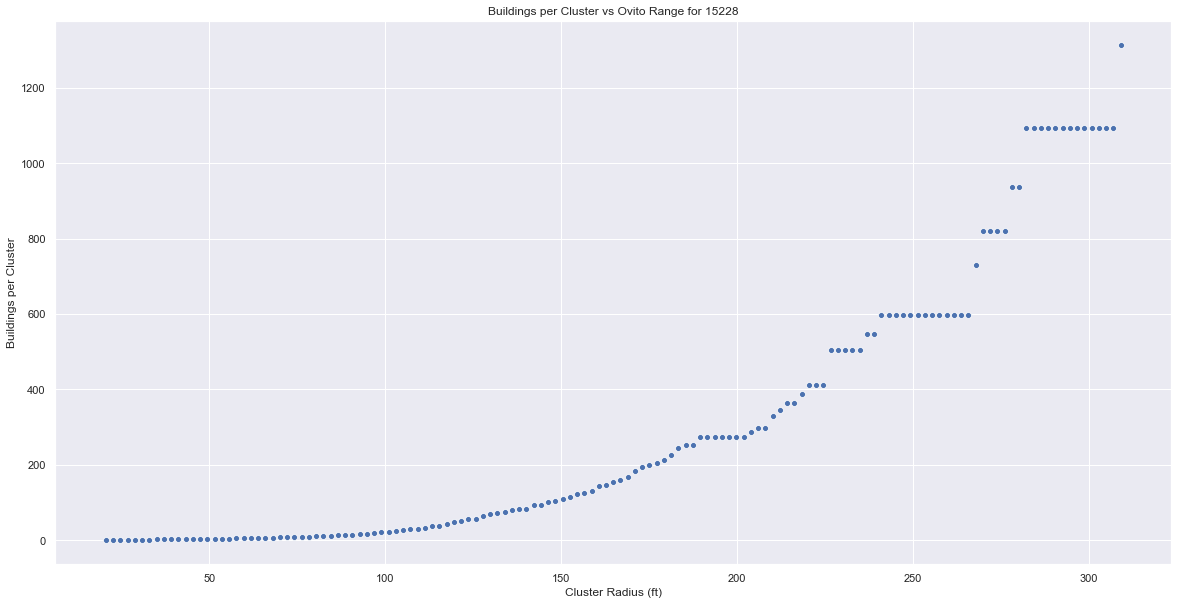

In [11]:
sns.set(rc={'figure.figsize':(20, 10)})

zip_dist = sns.scatterplot(x = final_frame['Ovito Range'] * int(scale), y = final_frame['Buildings per Cluster'])

zip_dist.set_title('Buildings per Cluster vs Ovito Range for ' + str(zip_code))

zip_dist.set(ylabel = 'Buildings per Cluster', xlabel = 'Cluster Radius (ft)')

In [12]:
# This saves the figure that's generated

fig = zip_dist.get_figure()

fig.savefig('Pictures and Figures/' + zip_code + '_per_cluster.png')